# Predict calculated fields

Identify the most important features in predicting key calculated features, using random forest variable importance.

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from matplotlib import pyplot as plt
import seaborn as sns

### Columns

In [2]:
COLS = [
    'DSI',
    'E00200',
    'E00300',
    'E00400',
    'E00600',
    'E00650',
    'E00700',
    'E00800',
    'E00900',
    'E01100',
    'E01200',
    'E01400',
    'E01500',
    'E01700',
    'E02000',
    'E02100',
    'E02300',
    'E02400',
    'E03150',
    'E03210',
    'E03220',
    'E03230',
    'E03240',
    'E03270',
    'E03290',
    'E03300',
    'E03400',
    'E03500',
    'E07240',
    'E07260',
    'E07300',
    'E07400',
    'E07600',
    'E09700',
    'E09800',
    'E09900',
    'E11200',
    'E17500',
    'E18400',
    'E18500',
    'E19200',
    'E19800',
    'E20100',
    'E20400',
    'E24515',
    'E24518',
    'E26270',
    'E27200',
    'E32800',
    'E58990',
    'E62900',
    'E87521',
    'E87530',
    'EIC',
    'F2441',
    'F6251',
    'FDED',
    'MARS',
    'MIDR',
    'N24',
    'P08000',
    'P22250',
    'P23250',
    'S006',
    'XTOT']

In [3]:
CALCULATED_COLS = [
    'E00100',
    'E04600',
    'P04470',
    'E04800',
    'E62100',
    'E05800',
    'E08800',
    'E59560',
    'E26190'
]

In [4]:
AGG_RECIDS = [999996, 999997, 999998, 999999]

### Load

In [5]:
puf = pd.read_csv('~/puf2011.csv', usecols=COLS + CALCULATED_COLS + ['RECID'])
puf = puf[~puf.RECID.isin(AGG_RECIDS)].drop('RECID', axis=1)

## Predict

In [6]:
rf = ensemble.RandomForestRegressor(n_estimators=50, random_state=0)

In [7]:
importances_list = []

In [8]:
%%time

for col in CALCULATED_COLS:
    print('Analyzing ' + col + '...')
    rf.fit(puf[COLS], puf[col])
    importance = pd.DataFrame({
        'x': COLS,
        'y': col,
        'importance': rf.feature_importances_
    })
    importances_list.append(importance)

Analyzing E00100...
Analyzing E04600...
Analyzing P04470...
Analyzing E04800...
Analyzing E62100...
Analyzing E05800...
Analyzing E08800...
Analyzing E59560...
Analyzing E26190...
CPU times: user 31min 55s, sys: 2.16 s, total: 31min 58s
Wall time: 32min 5s


In [9]:
importances = pd.concat(importances_list)

In [10]:
importances.sort_values('importance', ascending=False).head(10)

,x,y,importance
64,XTOT,E04600,0.949684
53,EIC,E59560,0.730254
46,E26270,E26190,0.592347
38,E18400,P04470,0.462650
62,P23250,E04800,0.414032
62,P23250,E62100,0.406981
62,P23250,E00100,0.306376
38,E18400,E08800,0.306295
38,E18400,E05800,0.299746
38,E18400,E00100,0.258262


In [11]:
importances['importance_rank'] = importances.groupby('y').importance.rank(ascending=False)

In [12]:
max_imp = importances.groupby('x').importance_rank.max()
mean_imp = importances.groupby('x').importance_rank.mean()

In [13]:
imp_pivot = importances.pivot_table(
    index='x', columns='y', values='importance_rank').loc[
    mean_imp.sort_values(ascending=True).index.values]
imp_pivot.head(10)

y,E00100,E04600,E04800,E05800,E08800,E26190,E59560,E62100,P04470
x,,,,,,,,,
E00200,5.0,3.0,4.0,3.0,3.0,2.0,2.0,6.0,21.0
E18400,2.0,11.0,3.0,1.0,1.0,7.0,25.0,2.0,1.0
S006,3.0,6.0,2.0,2.0,2.0,25.0,5.0,3.0,7.0
E02000,4.0,14.0,5.0,4.0,4.0,3.0,8.0,4.0,14.0
P23250,1.0,16.0,1.0,5.0,5.0,9.0,21.0,1.0,10.0
E26270,7.0,21.0,6.0,6.0,6.0,1.0,14.0,8.0,13.0
E00300,10.0,9.0,13.0,8.0,8.0,8.0,6.0,14.0,6.0
P22250,9.0,18.0,8.0,7.0,7.0,5.0,29.0,10.0,8.0
E00900,11.0,7.0,14.0,11.0,11.0,19.0,3.0,18.0,20.0


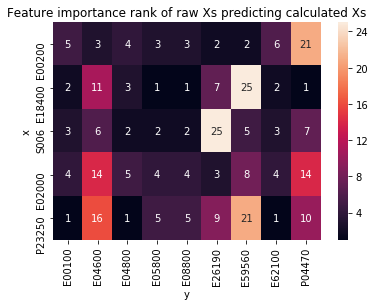

In [16]:
sns.heatmap(imp_pivot.head(5), annot=True)
plt.title('Feature importance rank of raw Xs predicting calculated Xs')
plt.show()

### Again without `S006`

Since we're not using the synthesized version anyway.

In [24]:
cols_no_s006 = set(COLS) - set(['S006'])

In [25]:
importances_list2 = []

In [26]:
%%time

for col in CALCULATED_COLS:
    print('Analyzing ' + col + '...')
    rf.fit(puf[COLS], puf[col])
    importance = pd.DataFrame({
        'x': COLS,
        'y': col,
        'importance': rf.feature_importances_
    })
    importances_list2.append(importance)

Analyzing E00100...
Analyzing E04600...
Analyzing P04470...
Analyzing E04800...
Analyzing E62100...
Analyzing E05800...
Analyzing E08800...
Analyzing E59560...
Analyzing E26190...
CPU times: user 30min 38s, sys: 1.68 s, total: 30min 40s
Wall time: 30min 45s


In [27]:
importances2 = pd.concat(importances_list2)

In [28]:
importances2.sort_values('importance', ascending=False).head(10)

,x,y,importance
64,XTOT,E04600,0.949684
53,EIC,E59560,0.730254
46,E26270,E26190,0.592347
38,E18400,P04470,0.462650
62,P23250,E04800,0.414032
62,P23250,E62100,0.406981
62,P23250,E00100,0.306376
38,E18400,E08800,0.306295
38,E18400,E05800,0.299746
38,E18400,E00100,0.258262


In [29]:
importances2['importance_rank'] = importances2.groupby('y').importance.rank(ascending=False)

In [30]:
max_imp2 = importances2.groupby('x').importance_rank.max()
mean_imp2 = importances2.groupby('x').importance_rank.mean()

In [31]:
imp_pivot2 = importances2.pivot_table(
    index='x', columns='y', values='importance_rank').loc[
    mean_imp2.sort_values(ascending=True).index.values]
imp_pivot2.head(10)

y,E00100,E04600,E04800,E05800,E08800,E26190,E59560,E62100,P04470
x,,,,,,,,,
E00200,5.0,3.0,4.0,3.0,3.0,2.0,2.0,6.0,21.0
E18400,2.0,11.0,3.0,1.0,1.0,7.0,25.0,2.0,1.0
S006,3.0,6.0,2.0,2.0,2.0,25.0,5.0,3.0,7.0
E02000,4.0,14.0,5.0,4.0,4.0,3.0,8.0,4.0,14.0
P23250,1.0,16.0,1.0,5.0,5.0,9.0,21.0,1.0,10.0
E26270,7.0,21.0,6.0,6.0,6.0,1.0,14.0,8.0,13.0
E00300,10.0,9.0,13.0,8.0,8.0,8.0,6.0,14.0,6.0
P22250,9.0,18.0,8.0,7.0,7.0,5.0,29.0,10.0,8.0
E00900,11.0,7.0,14.0,11.0,11.0,19.0,3.0,18.0,20.0


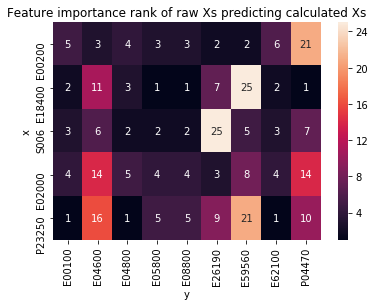

In [32]:
sns.heatmap(imp_pivot2.head(5), annot=True)
plt.title('Feature importance rank of raw Xs predicting calculated Xs')
plt.show()